In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp



In [2]:
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.eda.auto as auto

# Voy a usar Autogluon 

# Data Load

In [3]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')

res = pd.read_csv("data/sample_submission.csv")

# Eda

In [4]:
target_col = 'SalePrice'
df_train = train.copy()
df_test = pd.merge(test, res, on="Id", how="inner")

**`train_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
1stFlrSF,1460,753,,,1162.626712,386.587738,334.0,882.0,1087.0,1391.25,4692.0,int64,,,int,numeric,
2ndFlrSF,1460,417,,,346.992466,436.528436,0.0,0.0,0.0,728.0,2065.0,int64,,,int,numeric,
3SsnPorch,1460,20,,,3.409589,29.317331,0.0,0.0,0.0,0.0,508.0,int64,,,int,category,
Alley,91,2,Grvl,50,,,,,,,,object,1369,0.937671,object,category,
BedroomAbvGr,1460,8,,,2.866438,0.815778,0.0,2.0,3.0,3.0,8.0,int64,,,int,category,
BldgType,1460,5,1Fam,1220,,,,,,,,object,,,object,category,
BsmtCond,1423,4,TA,1311,,,,,,,,object,37,0.025342,object,category,
BsmtExposure,1422,4,No,953,,,,,,,,object,38,0.026027,object,category,
BsmtFinSF1,1460,637,,,443.639726,456.098091,0.0,0.0,383.5,712.25,5644.0,int64,,,int,numeric,
BsmtFinSF2,1460,144,,,46.549315,161.319273,0.0,0.0,0.0,0.0,1474.0,int64,,,int,numeric,


**`test_data` dataset summary**

,count,unique,top,freq,mean,std,min,25%,50%,75%,max,dtypes,missing_count,missing_ratio,raw_type,variable_type,special_types
1stFlrSF,1459,789,,,1156.534613,398.16582,407.0,873.5,1079.0,1382.5,5095.0,int64,,,int,numeric,
2ndFlrSF,1459,407,,,325.967786,420.610226,0.0,0.0,0.0,676.0,1862.0,int64,,,int,numeric,
3SsnPorch,1459,13,,,1.79438,20.207842,0.0,0.0,0.0,0.0,360.0,int64,,,int,category,
Alley,107,2,Grvl,70,,,,,,,,object,1352,0.926662,object,category,
BedroomAbvGr,1459,7,,,2.85401,0.829788,0.0,2.0,3.0,3.0,6.0,int64,,,int,category,
BldgType,1459,5,1Fam,1205,,,,,,,,object,,,object,category,
BsmtCond,1414,4,TA,1295,,,,,,,,object,45,0.030843,object,category,
BsmtExposure,1415,4,No,951,,,,,,,,object,44,0.030158,object,category,
BsmtFinSF1,1458,669,,,439.203704,455.268042,0.0,0.0,350.5,753.5,4010.0,float64,1,0.000685,float,numeric,
BsmtFinSF2,1458,161,,,52.619342,176.753926,0.0,0.0,0.0,0.0,1526.0,float64,1,0.000685,float,numeric,


**Types warnings summary**

,train_data,test_data,warnings
BsmtFinSF1,int,float,warning
BsmtFinSF2,int,float,warning
BsmtFullBath,int,float,warning
BsmtHalfBath,int,float,warning
BsmtUnfSF,int,float,warning
GarageArea,int,float,warning
GarageCars,int,float,warning
SalePrice,int,float,warning
TotalBsmtSF,int,float,warning


### Feature Distance

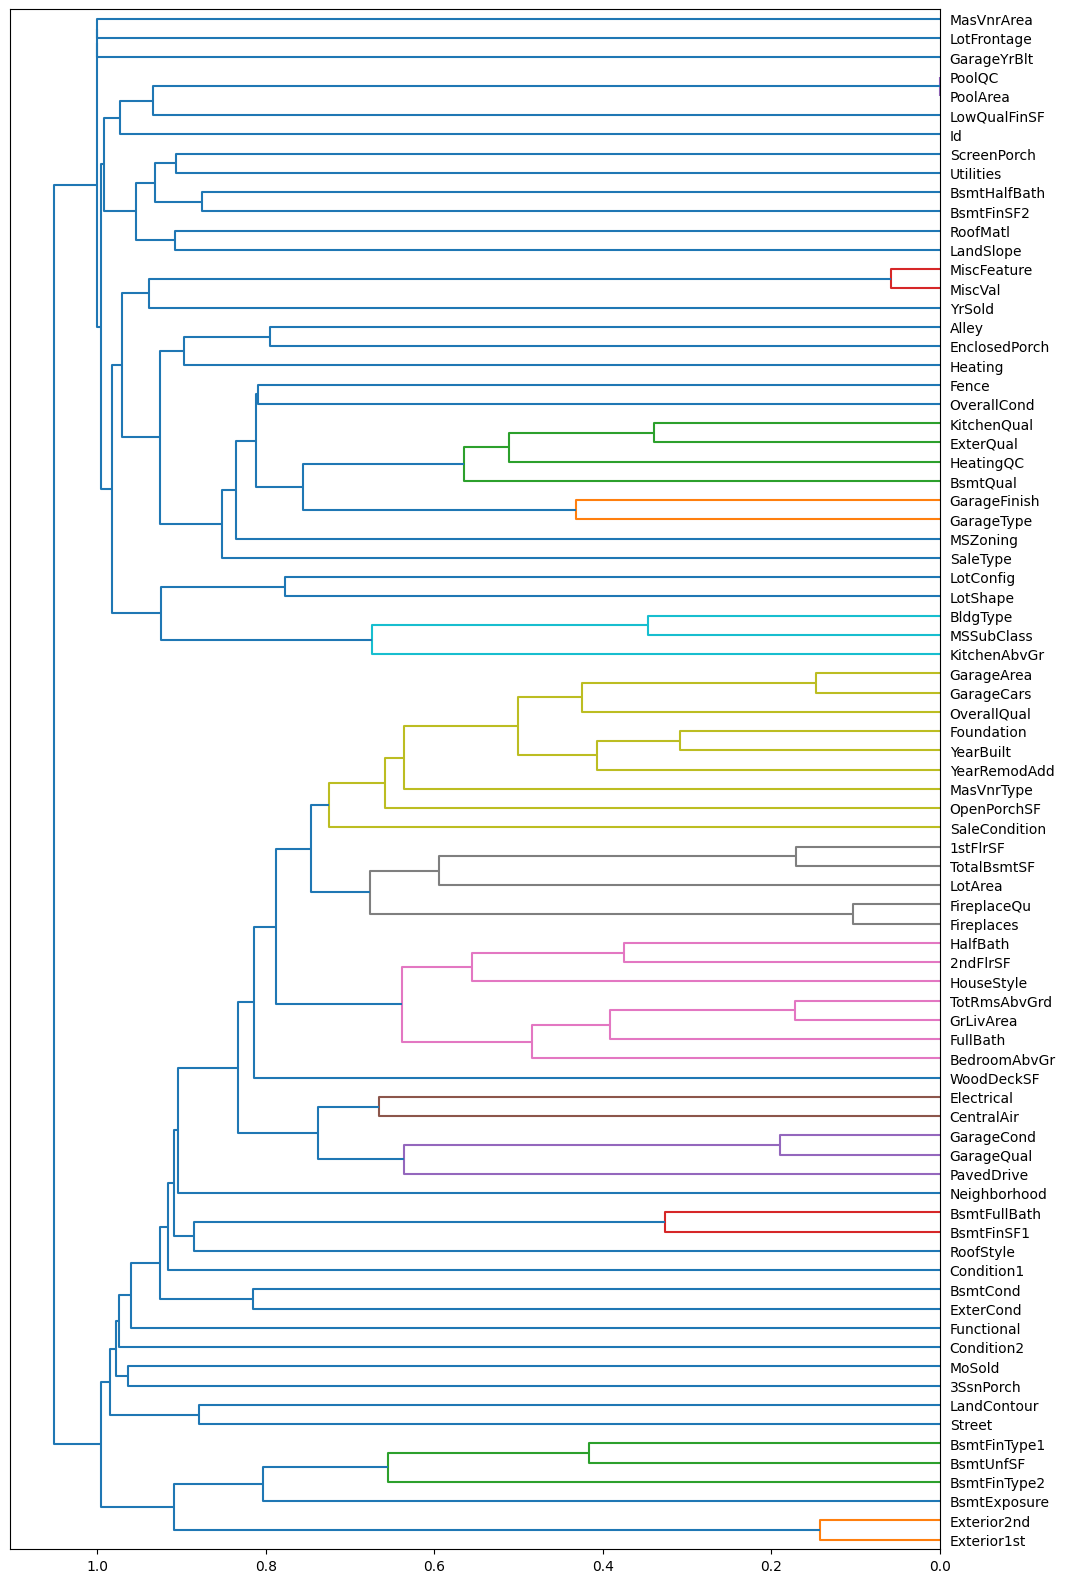

**The following feature groups are considered as near-duplicates**:

Distance threshold: <= `0.01`. Consider keeping only some of the columns within each group:

 - `PoolArea`, `PoolQC` - distance `0.00`

In [12]:
auto.dataset_overview(train_data=df_train, test_data=df_test, label=target_col)

In [5]:
missing_per = df_train.isnull().mean().sort_values(ascending=False)

In [6]:
missing_per = df_train.isnull().mean().sort_values(ascending=False)
missing_per.describe()

count    81.000000
mean      0.058896
std       0.207417
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       0.995205
dtype: float64

In [7]:
drop_miss_tr = sorted(list(missing_per[missing_per > 0.3].index))
print(f'Numero de columnas a quitar {len(drop_miss_tr)} \n',drop_miss_tr)

Numero de columnas a quitar 5 
 ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']


In [8]:
missing_per = df_test.isnull().mean().sort_values(ascending=False)
missing_per.describe()

count    81.000000
mean      0.059232
std       0.207276
min       0.000000
25%       0.000000
50%       0.000000
75%       0.001371
max       0.997944
dtype: float64

In [9]:
drop_miss_ts = sorted(list(missing_per[missing_per > 0.3].index))
print(f'Numero de columnas a quitar {len(drop_miss_ts)} \n',drop_miss_ts)

Numero de columnas a quitar 5 
 ['Alley', 'Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC']


## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
SalePrice,1460,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0,int64,663,,,int,


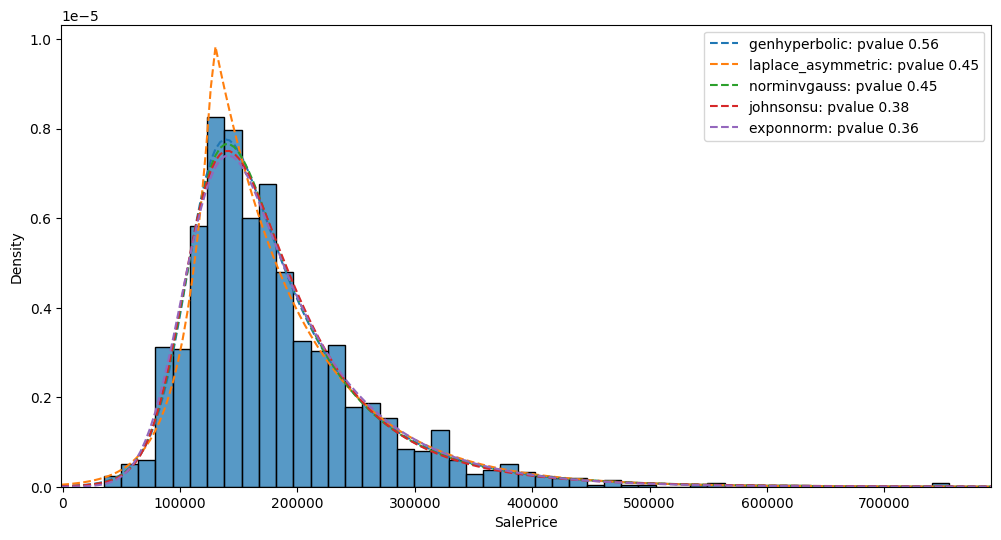

### Distribution fits for target variable
 - [genhyperbolic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.genhyperbolic.html)
   - p-value: 0.557
   - Parameters: (p: 0.0363115152093238, a: 1.6414147741625293, b: 1.1538054248291978, loc: 113738.66098862841, scale: 48381.324187055405)
 - [laplace_asymmetric](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace_asymmetric.html)
   - p-value: 0.452
   - Parameters: (kappa: 0.5629304217818978, loc: 128999.9999999988, scale: 42786.74049552504)
 - [norminvgauss](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norminvgauss.html)
   - p-value: 0.452
   - Parameters: (a: 2.1436124459773427, b: 1.6379411350403177, loc: 109163.0640586915, scale: 60581.79216623007)
 - [johnsonsu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.johnsonsu.html)
   - p-value: 0.383
   - Parameters: (a: -1.566133302461061, b: 1.489965129131758, loc: 93994.93437276583, scale: 55321.648943680004)
 - [exponnorm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.exponnorm.html)
   - p-value: 0.360
   - Parameters: (K: 2.5359994455907016, loc: 108983.17633716407, scale: 28366.732739203246)

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `SalePrice` >= `0.5`**

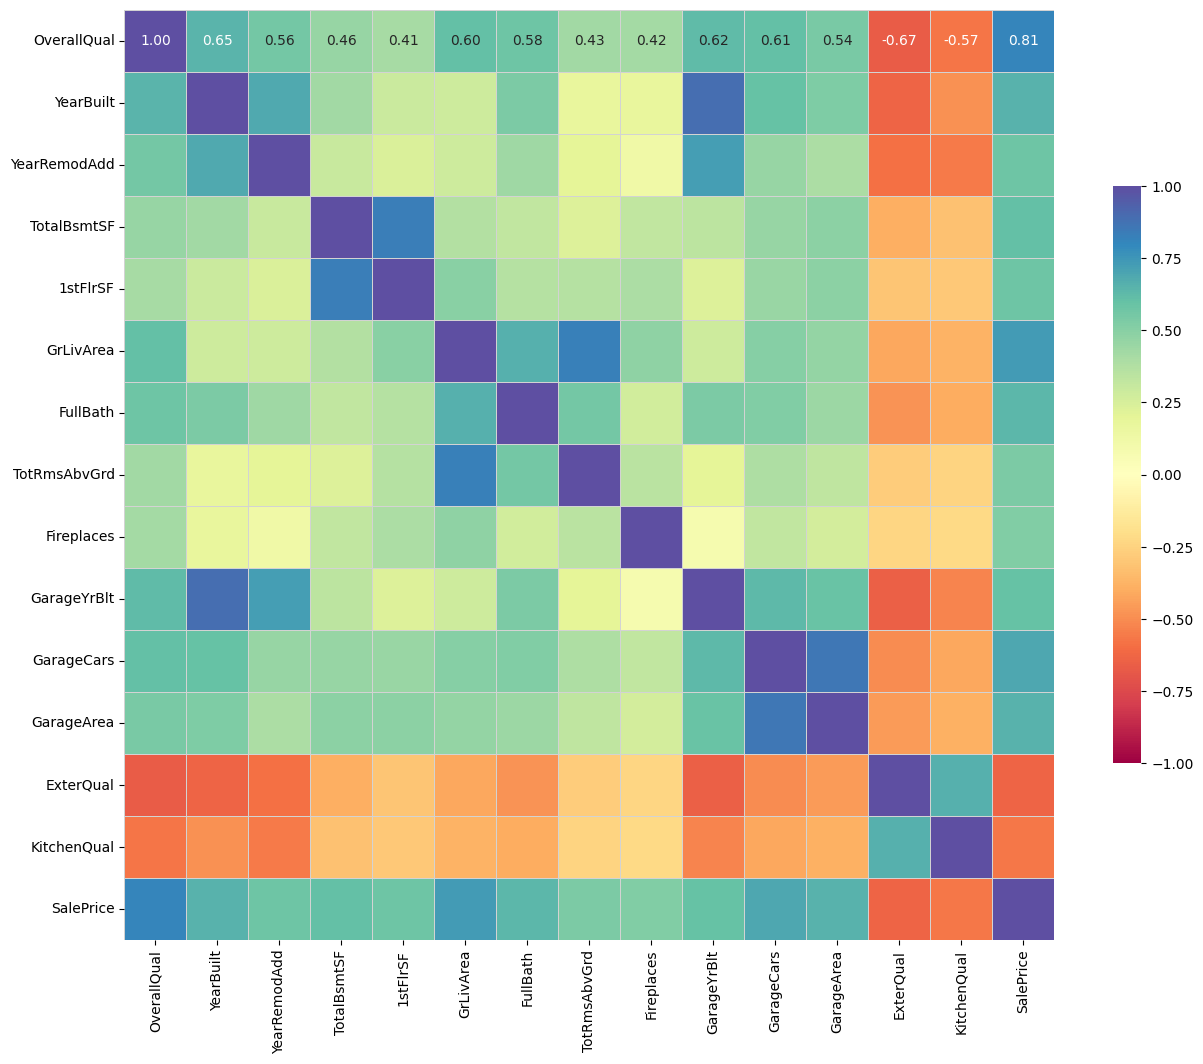

**Feature interaction between `OverallQual`/`SalePrice` in `train_data`**

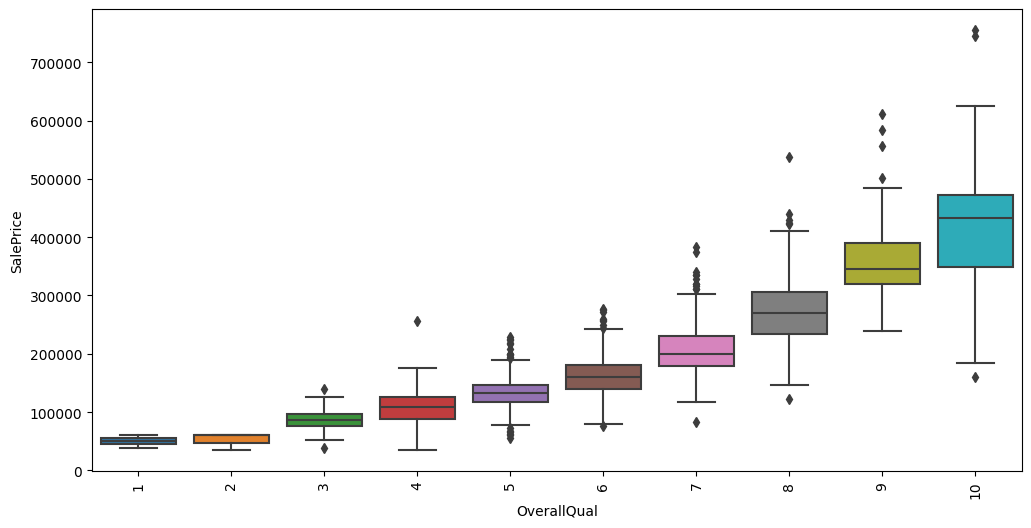

**Feature interaction between `GrLivArea`/`SalePrice` in `train_data`**

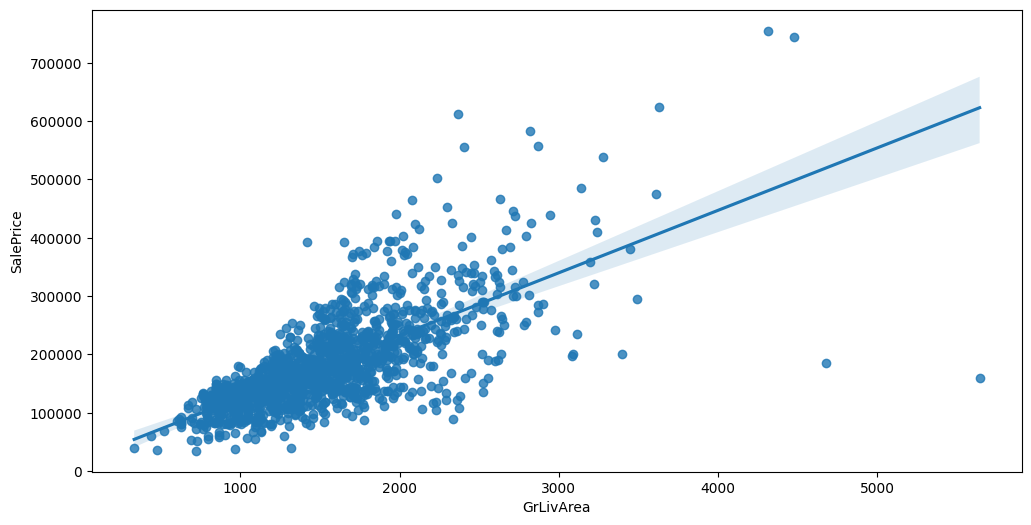

**Feature interaction between `GarageCars`/`SalePrice` in `train_data`**

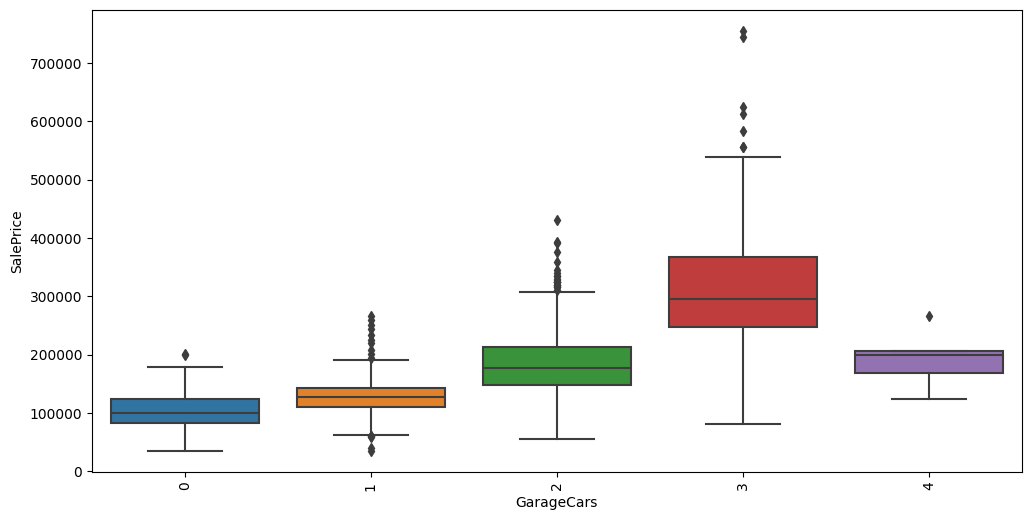

**Feature interaction between `YearBuilt`/`SalePrice` in `train_data`**

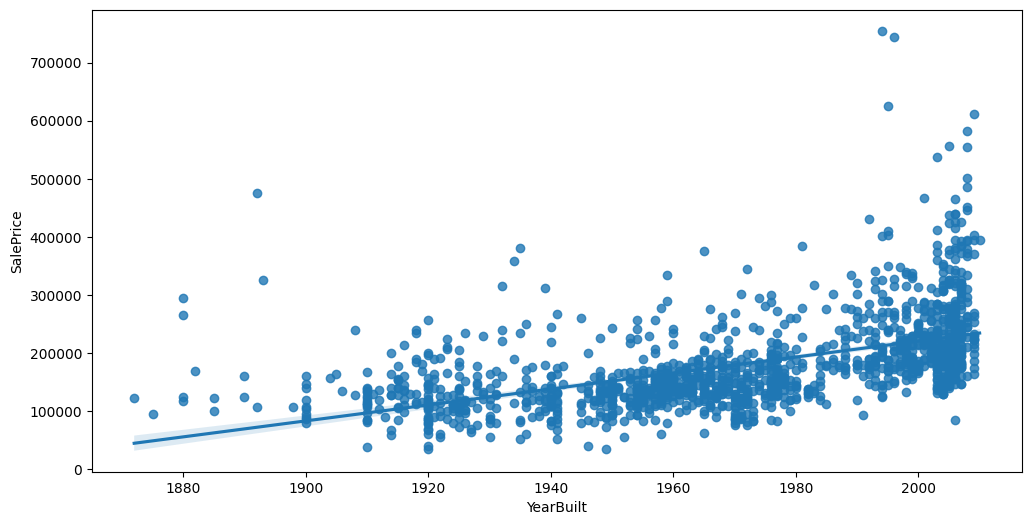

**Feature interaction between `GarageArea`/`SalePrice` in `train_data`**

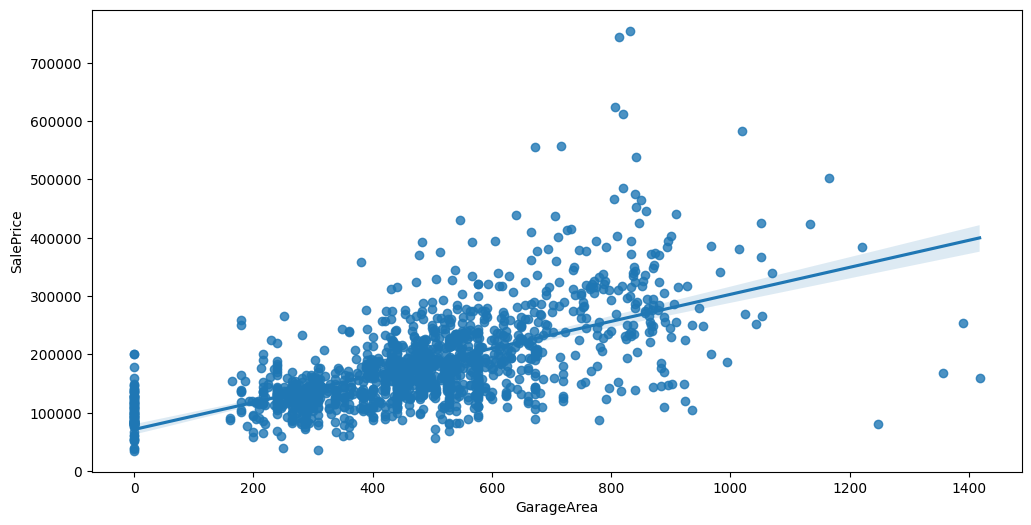

**Feature interaction between `FullBath`/`SalePrice` in `train_data`**

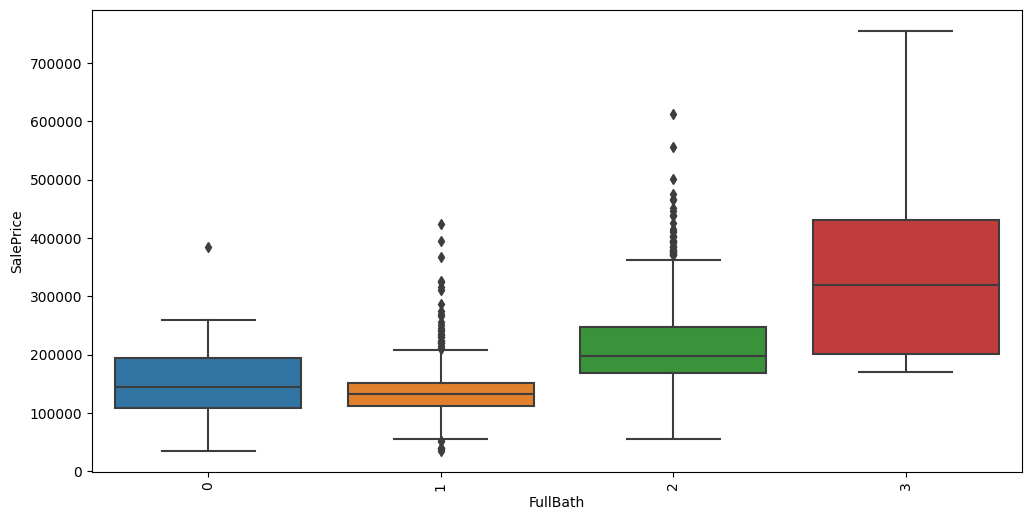

**Feature interaction between `TotalBsmtSF`/`SalePrice` in `train_data`**

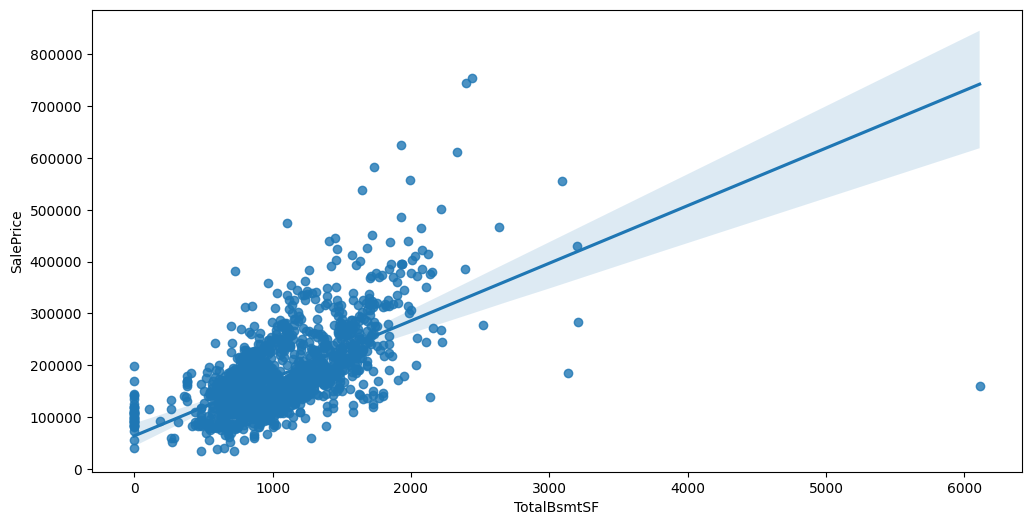

**Feature interaction between `GarageYrBlt`/`SalePrice` in `train_data`**

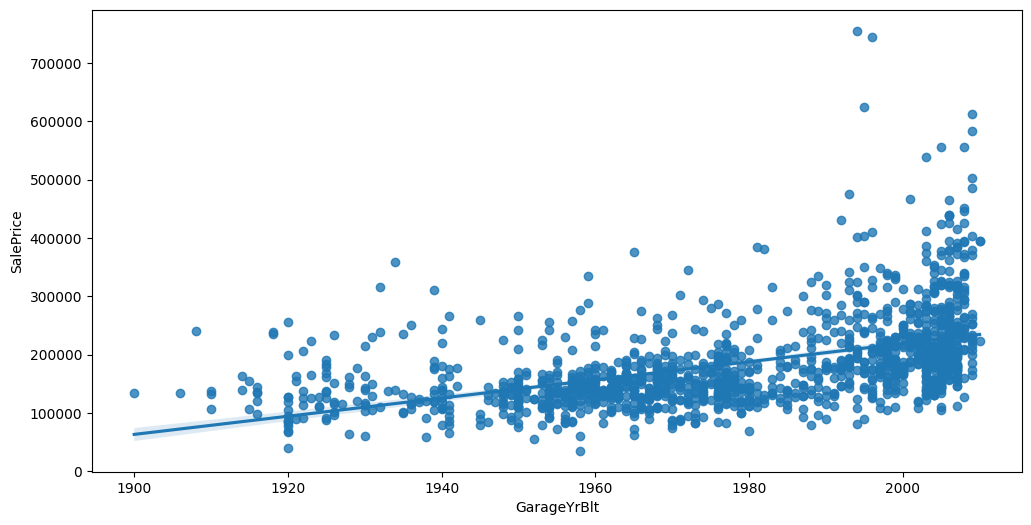

**Feature interaction between `1stFlrSF`/`SalePrice` in `train_data`**

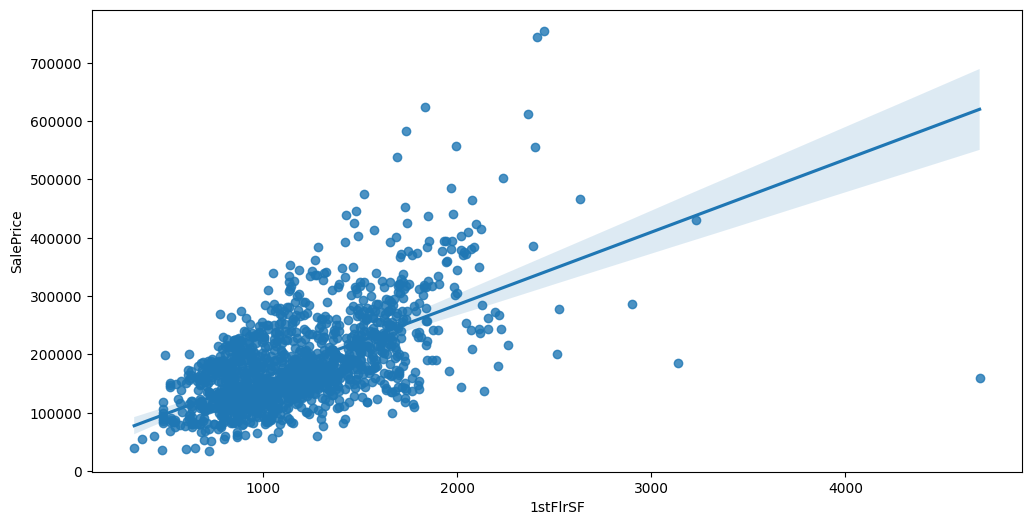

**Feature interaction between `YearRemodAdd`/`SalePrice` in `train_data`**

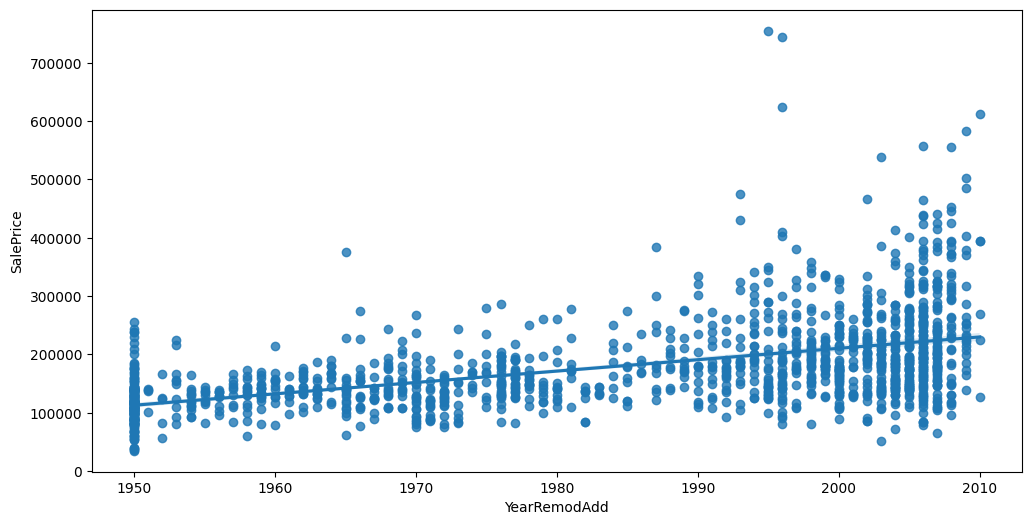

**Feature interaction between `TotRmsAbvGrd`/`SalePrice` in `train_data`**

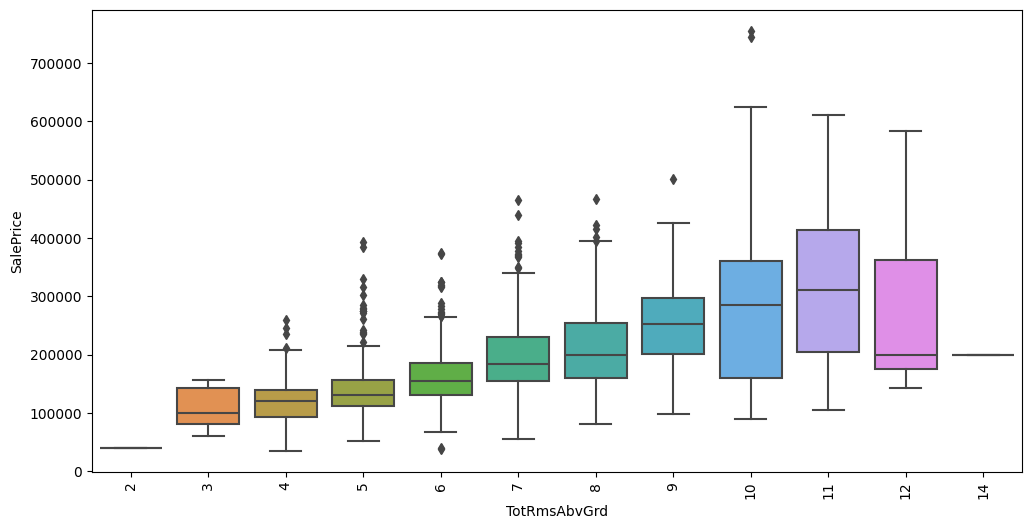

**Feature interaction between `Fireplaces`/`SalePrice` in `train_data`**

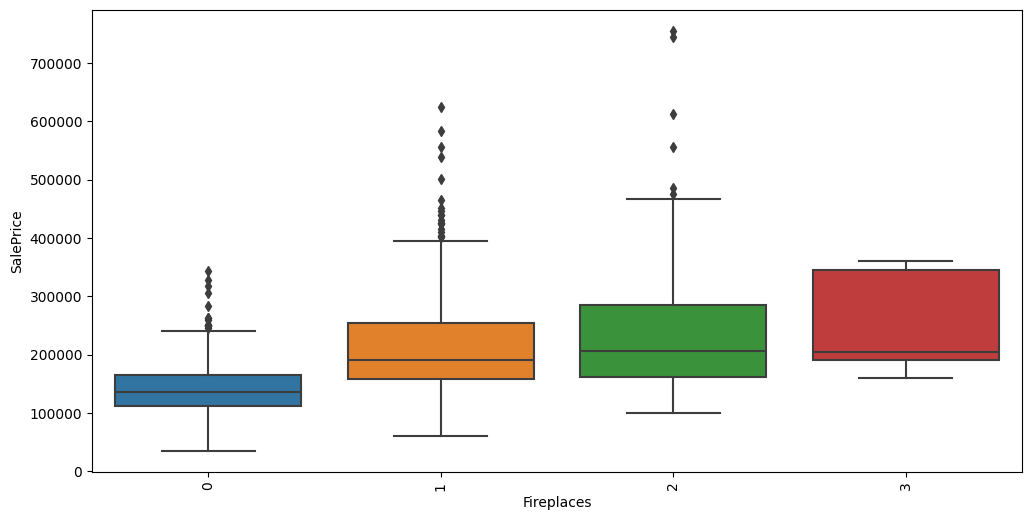

**Feature interaction between `KitchenQual`/`SalePrice` in `train_data`**

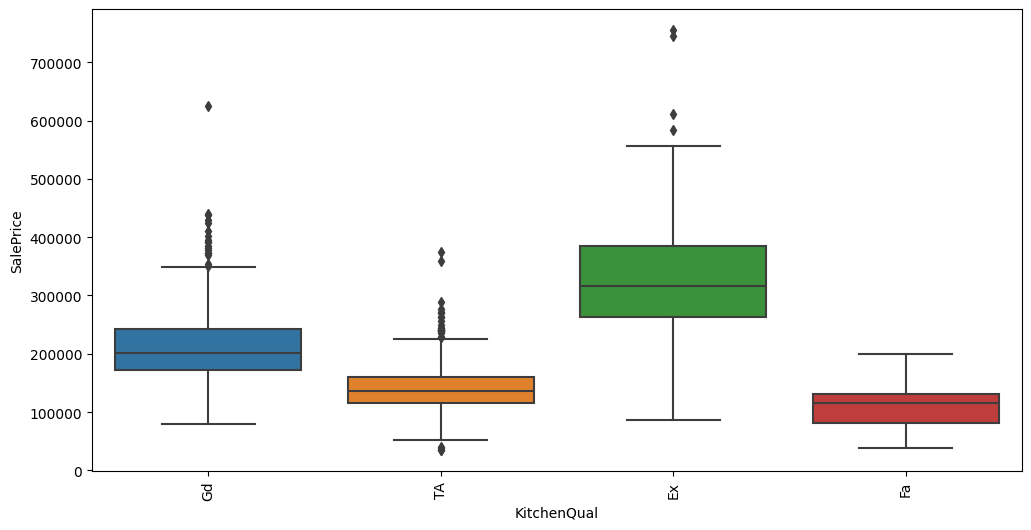

**Feature interaction between `ExterQual`/`SalePrice` in `train_data`**

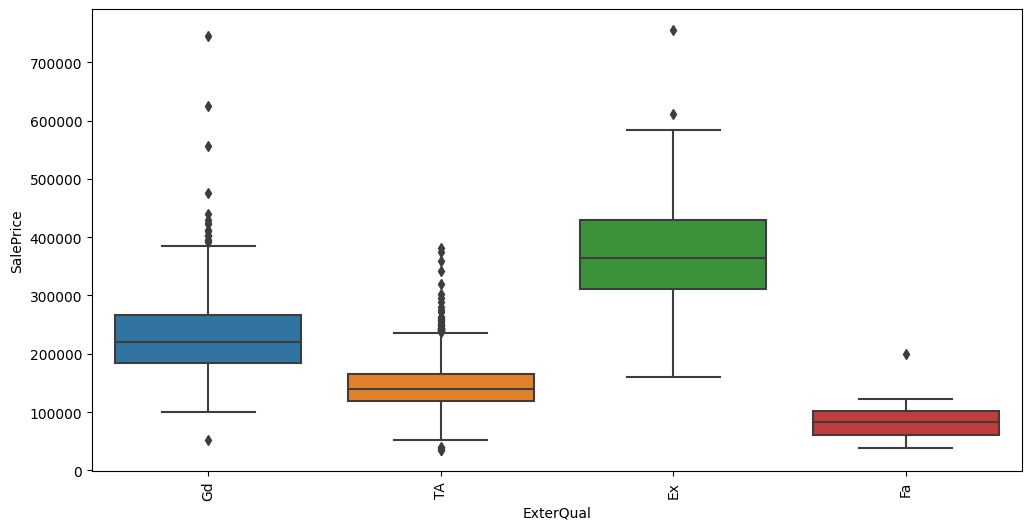

In [13]:
auto.target_analysis(train_data=df_train, label=target_col)

In [10]:
correlacion = df_train.corr(numeric_only=True)
correlacion_y = abs(correlacion['SalePrice']).sort_values(ascending=False)

drop_corr = sorted(list(correlacion_y[correlacion_y < 0.03].index))
print(f'Numero de columnas a quitar {len(drop_corr)} \n',drop_corr)

Numero de columnas a quitar 6 
 ['BsmtFinSF2', 'BsmtHalfBath', 'Id', 'LowQualFinSF', 'MiscVal', 'YrSold']


In [11]:
feature_correlation = df_train.loc[:, df_train.columns != 'SalePrice'].corr()
feature_correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359


In [12]:
upper = feature_correlation.where(np.triu(np.ones(feature_correlation.shape), k=1).astype(np.bool_))

# Encuentra variables con correlacion mayor a threshold
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

to_drop

[]

No path specified. Models will be saved in: "AutogluonModels/ag-20250202_022931/"


### Model Prediction for SalePrice

Using validation data for `Test` points

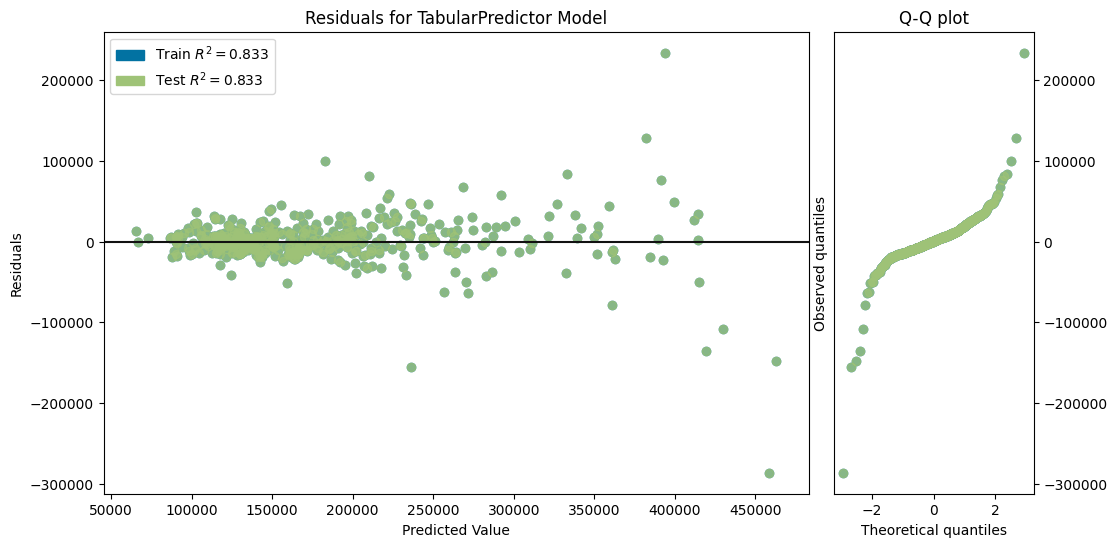

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-30529.412291,-32535.182194,0.005933,0.005339,0.694664,0.005933,0.005339,0.694664,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,11716.915326,705.955990,1.573763e-06,5,13170.488468,10263.342185
GrLivArea,6071.089919,394.407430,2.125470e-06,5,6883.180269,5258.999569
GarageCars,3209.379857,372.418575,2.137296e-05,5,3976.194851,2442.564863
BsmtFinSF1,2719.389615,125.895615,5.496647e-07,5,2978.610426,2460.168805
TotalBsmtSF,2187.752068,328.342663,5.909712e-05,5,2863.814149,1511.689987
1stFlrSF,1688.228494,248.951746,5.513520e-05,5,2200.823579,1175.633408
Neighborhood,1534.658374,377.814804,4.073284e-04,5,2312.584278,756.732471
HalfBath,881.236830,353.675558,2.542584e-03,5,1609.459692,153.013968
2ndFlrSF,872.631138,123.229525,4.647906e-05,5,1126.362433,618.899844
Fireplaces,868.173697,364.469844,2.989959e-03,5,1618.622144,117.725249


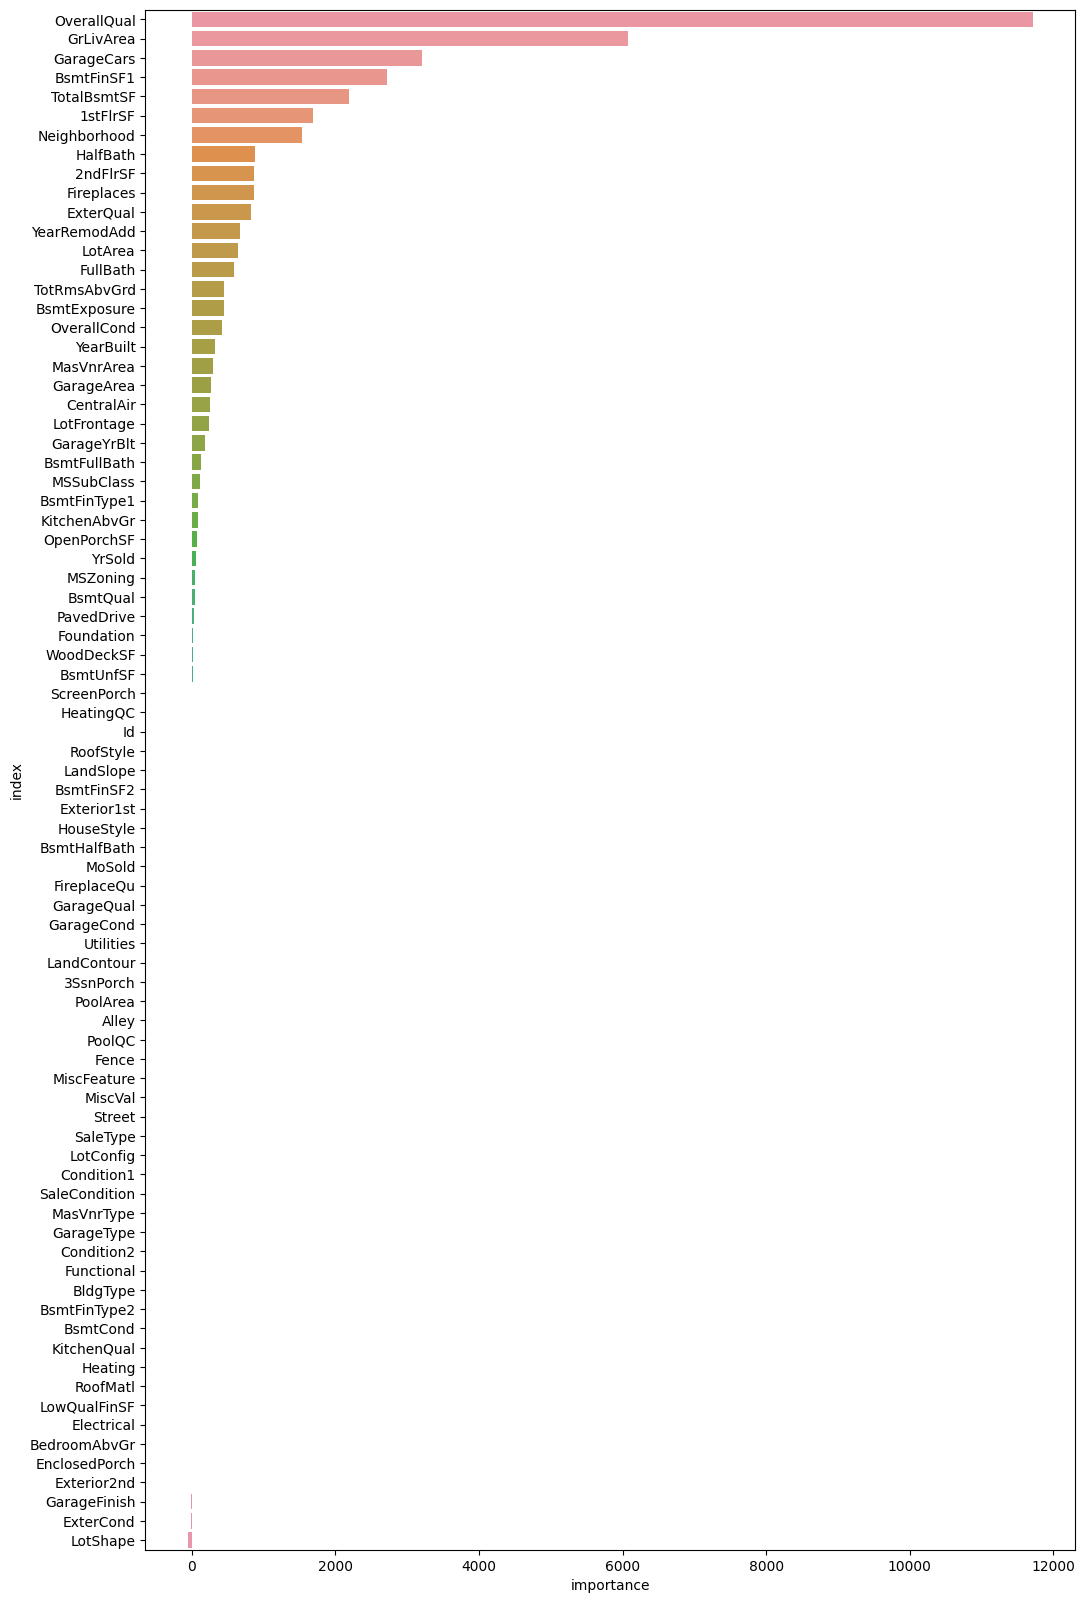

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_pred,error
1182,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,MnPrv,NaN,0,7,2007,WD,Abnorml,745000,458492.125000,286507.875000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,NaN,NaN,0,1,2008,New,Partial,160000,394141.625000,234141.625000
688,689,20,RL,60.0,8089,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,10,2007,New,Partial,392000,236151.000000,155849.000000
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,3,2010,New,Partial,611657,463175.906250,148481.093750
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Normal,555000,419354.593750,135645.406250
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,8,2009,New,Partial,253293,382104.968750,128811.968750
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,429698.281250,108301.718750
632,633,20,RL,85.0,11900,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,4,2009,WD,Family,82500,182936.734375,100436.734375
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,333203.062500,83203.062500
666,667,60,RL,NaN,18450,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,8,2007,WD,Abnorml,129000,210298.609375,81298.609375


In [8]:
state = auto.quick_fit(
    df_train, 
    target_col, 
    return_state=True,
    show_feature_importance_barplots=True
)

We detected a substantial difference between the training and test X distributions,
a type of distribution shift.

**Test results**: We can predict whether a sample is in the test vs. training set with a `roc_auc` of
`1.0000` with a p-value of `0.0010` (smaller than the threshold of `0.0100)`.



**Feature importances**: The variables that are the most responsible for this shift are those with high feature importance:



,importance,stddev,p_value,n,p99_high,p99_low
Id,0.494653,0.019294,2.771819e-07,5,0.534379,0.454927
YrSold,0.000905,0.000113,2.820510e-05,5,0.001137,0.000673
MoSold,0.000065,0.000034,6.510152e-03,5,0.000134,-0.000005
BsmtFullBath,0.000014,0.000008,9.281282e-03,5,0.000030,-0.000003
EnclosedPorch,0.000011,0.000002,1.940857e-04,5,0.000016,0.000007


**`Id` values distribution between datasets; p-value: `0.0000`**

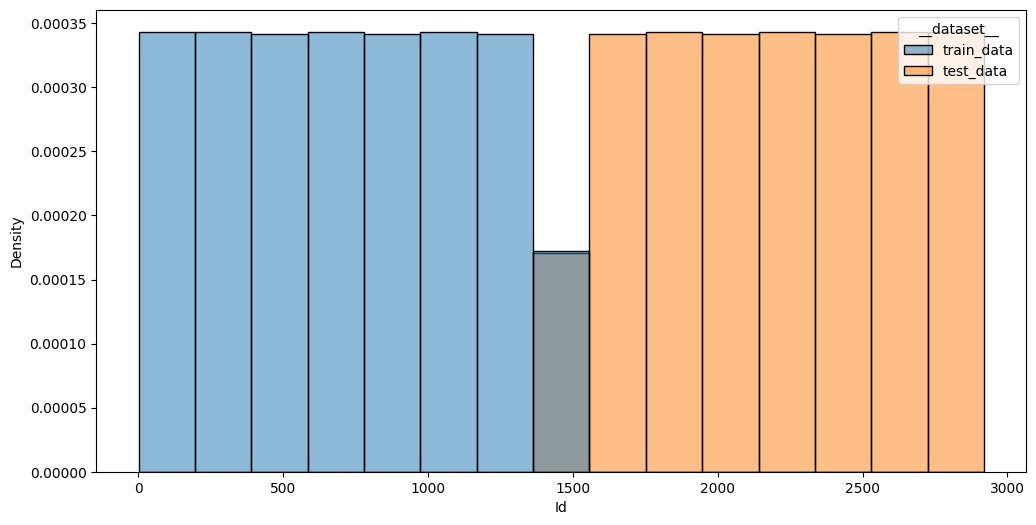

**`EnclosedPorch` values distribution between datasets; p-value: `0.0002`**

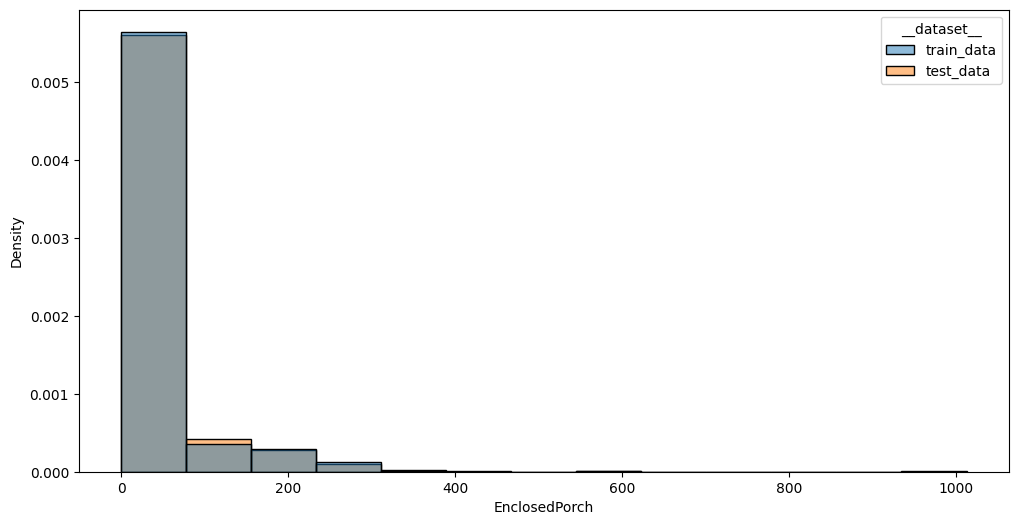

In [9]:
auto.covariate_shift_detection(train_data=df_train, test_data=df_test, label=target_col)

# Llenamos por la media y moda los valores que tienen nulos en las columnas que tienen porcentaje de nulo bajo

In [28]:
x = df_train.copy()
x_test = df_test.copy()

x_filled = x.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'if' else col.fillna(col.mode()[0]))
x_test_filled = x_test.apply(lambda col: col.fillna(col.mean()) if col.dtype.kind in 'if' else col.fillna(col.mode()[0]))

### Anomaly Detection Report

When interpreting anomaly scores, consider:
* **Threshold**: Determine a suitable threshold to separate normal from anomalous data points,     based on domain knowledge or statistical methods.
* **Context**: Examine the context of anomalies, including time, location, and surrounding data points, to identify possible causes.
* **False positives/negatives**: Be aware of the trade-offs between false positives (normal points classified as anomalies)     and false negatives (anomalies missed).
* **Feature relevance**: Ensure the features used for anomaly detection are relevant and contribute to the model's performance.
* **Model performance**: Regularly evaluate and update the model to maintain its accuracy and effectiveness.

It's important to understand the context and domain knowledge before deciding on an appropriate approach to deal with anomalies.The choice of method depends on the data's nature, the cause of anomalies, and the problem being addressed.The common ways to deal with anomalies:

* **Removal**: If an anomaly is a result of an error, noise, or irrelevance to the analysis, it can be removed from the dataset     to prevent it from affecting the model's performance.
* **Imputation**: Replace anomalous values with appropriate substitutes, such as the mean, median, or mode of the feature,    or by using more advanced techniques like regression or k-nearest neighbors.
* **Transformation**: Apply transformations like log, square root, or z-score to normalize the data and reduce the impact of extreme values.
    Absolute dates might be transformed into relative features like age of the item.
* **Capping**: Set upper and lower bounds for a feature, and replace values outside these limits with the bounds themselves.    This method is also known as winsorizing.
* **Separate modeling**: Treat anomalies as a distinct group and build a separate model for them, or use specialized algorithms designed    for handling outliers, such as robust regression or one-class SVM.
* **Incorporate as a feature**: Create a new binary feature indicating the presence of an anomaly,     which can be useful if anomalies have predictive value.

<sub><sup>Use `show_help_text=False` to hide this information when calling this function.</sup></sub>

**`train_data` anomalies for 3-sigma outlier scores**

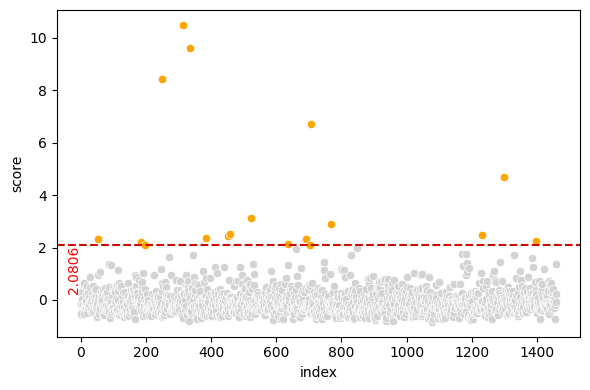

**`test_data` anomalies for 3-sigma outlier scores**

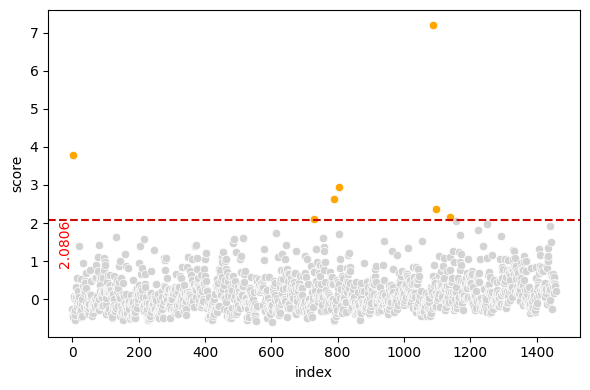

**Top-7 `train_data` anomalies (total: 18)**

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,score
313,314,20,RL,150.000000,215245,Pave,Grvl,IR3,Low,AllPub,...,Gd,MnPrv,Shed,0,6,2009,WD,Normal,375000,10.498389
335,336,190,RL,70.049958,164660,Grvl,Grvl,IR1,HLS,AllPub,...,Gd,MnPrv,Shed,700,8,2008,WD,Normal,228950,9.619666
249,250,50,RL,70.049958,159000,Pave,Grvl,IR2,Low,AllPub,...,Gd,MnPrv,Shed,500,6,2007,WD,Normal,277000,8.447242
706,707,20,RL,70.049958,115149,Pave,Grvl,IR2,Low,AllPub,...,Gd,MnPrv,Shed,0,6,2007,WD,Normal,302000,6.718605
1298,1299,60,RL,313.000000,63887,Pave,Grvl,IR3,Bnk,AllPub,...,Gd,MnPrv,Shed,0,1,2008,New,Partial,160000,4.689425
523,524,60,RL,130.000000,40094,Pave,Grvl,IR1,Bnk,AllPub,...,Gd,MnPrv,Shed,0,10,2007,New,Partial,184750,3.131861
769,770,60,RL,47.000000,53504,Pave,Grvl,IR2,HLS,AllPub,...,Gd,MnPrv,Shed,0,6,2010,WD,Normal,538000,2.905934


**Top-7 `test_data` anomalies (total: 7)**

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,score
1089,2550,20,RL,128.000000,39290,Pave,Grvl,IR1,Bnk,AllPub,...,Ex,MnPrv,Shed,17000,10,2007,New,Partial,230841.338626,7.203746
1,1462,20,RL,81.000000,14267,Pave,Grvl,IR1,Lvl,AllPub,...,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,187758.393989,3.800323
803,2264,20,RL,52.000000,51974,Pave,Grvl,IR1,Lvl,AllPub,...,Ex,MnPrv,Shed,0,6,2007,New,Partial,277936.126944,2.959193
790,2251,70,RL,68.580357,56600,Pave,Grvl,IR1,Low,AllPub,...,Ex,MnPrv,Shed,0,1,2008,WD,Normal,280618.132617,2.632150
1097,2558,90,RL,60.000000,10890,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,1512,1,2007,WD,AdjLand,218108.536770,2.371044
1139,2600,20,RL,200.000000,43500,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,GdPrv,Shed,0,6,2007,WD,Normal,234707.209860,2.168941
728,2189,20,RL,123.000000,47007,Pave,Grvl,IR1,Lvl,AllPub,...,Ex,MnPrv,Shed,0,7,2008,WD,Normal,281643.976117,2.096519


In [27]:


threshold_stds = 3

state = auto.detect_anomalies(
    train_data=x_filled,
    test_data=x_test_filled,
    label=target_col,
    threshold_stds=threshold_stds,
    show_top_n_anomalies=7,
    fig_args={
        'figsize': (6, 4)
    },
    chart_args={
        'normal.color': 'lightgrey',
        'anomaly.color': 'orange',
    }
)

# Quitamos columnas incessarias que determinamos en el EDA y feature selection

In [54]:

drop_id = 'Id'

total_drop = list(set(drop_miss_tr + to_drop + drop_corr)) + [drop_id]





In [55]:
total_drop

['Fence', 'FireplaceQu', 'Alley', 'MiscFeature', 'PoolQC', 'Id']

In [30]:
x_filled = x_filled.drop(columns=total_drop)
x_test_filled = x_test_filled.drop(columns=total_drop)

# Train del modelo

In [31]:
train_data = TabularDataset(x_filled)
test_data = TabularDataset(x_test_filled)


In [20]:
predictor = TabularPredictor(label=target_col).fit(train_data, presets='high_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250203_180006/"
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20250203_180006/"
AutoGluon Version:  0.8.3
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   aarch64
Platform Version:   #1 SMP Thu Oct 24 19:28:55 UTC 2024
Disk Space Avail:   834.76 GB / 994.66 GB (83.9%)
Train Data Rows:    1460
Train Data Columns: 69
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: 

[1000]	valid_set's rmse: 27780.9
[1000]	valid_set's rmse: 28019.2
[2000]	valid_set's rmse: 27689.2
[3000]	valid_set's rmse: 27594.8
[4000]	valid_set's rmse: 27584.3
[5000]	valid_set's rmse: 27584.5
[6000]	valid_set's rmse: 27585.6
[1000]	valid_set's rmse: 31478
[2000]	valid_set's rmse: 31064.7
[3000]	valid_set's rmse: 31046.9


	-25239.5301	 = Validation score   (-root_mean_squared_error)
	20.41s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-26658.1267	 = Validation score   (-root_mean_squared_error)
	6.02s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ...
	-29064.7015	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ...
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


In [32]:


path = 'AutogluonModels/ag-20250203_153657'

In [ ]:
predictor.leaderboard(train_data)

                  model    score_test     score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            LightGBMXT -11869.502888 -26536.319773        0.074853       0.015616    8.637591                 0.074853                0.015616           8.637591            1       True          3
1   WeightedEnsemble_L2 -11876.356730 -25611.325057        0.282891       0.066772  143.372216                 0.003912                0.000184           0.087375            2       True         11
2              LightGBM -12446.856320 -27832.016492        0.149374       0.028317   12.074772                 0.149374                0.028317          12.074772            1       True          4
3              CatBoost -13519.303665 -26969.550695        0.027153       0.011592  121.440869                 0.027153                0.011592         121.440869            1       True          6
4         

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,-11869.502888,-26536.319773,0.074853,0.015616,8.637591,0.074853,0.015616,8.637591,1,True,3
1,WeightedEnsemble_L2,-11876.356730,-25611.325057,0.282891,0.066772,143.372216,0.003912,0.000184,0.087375,2,True,11
2,LightGBM,-12446.856320,-27832.016492,0.149374,0.028317,12.074772,0.149374,0.028317,12.074772,1,True,4
3,CatBoost,-13519.303665,-26969.550695,0.027153,0.011592,121.440869,0.027153,0.011592,121.440869,1,True,6
4,LightGBMLarge,-14303.053681,-31979.348303,0.074221,0.013337,7.243020,0.074221,0.013337,7.243020,1,True,10
5,ExtraTreesMSE,-17136.156054,-32009.317473,0.065910,0.040710,0.276908,0.065910,0.040710,0.276908,1,True,7
6,RandomForestMSE,-17205.845544,-31919.559574,0.079977,0.041687,0.385076,0.079977,0.041687,0.385076,1,True,5
7,NeuralNetFastAI,-17444.259094,-28898.258715,0.027598,0.011063,1.131609,0.027598,0.011063,1.131609,1,True,8
8,KNeighborsDist,-22437.238762,-50170.015486,0.003337,0.004023,0.003368,0.003337,0.004023,0.003368,1,True,2
9,NeuralNetTorch,-27757.652214,-36627.651810,0.031769,0.012668,2.660894,0.031769,0.012668,2.660894,1,True,9


In [ ]:
predictor.evaluate(test_data)

Evaluation: root_mean_squared_error on test data: -72754.88999620892
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -72754.88999620892,
    "mean_squared_error": -5293274018.36046,
    "mean_absolute_error": -54894.23346939602,
    "r2": -18.412938806983085,
    "pearsonr": 0.30179333246439416,
    "median_absolute_error": -44999.952527557005
}


{'root_mean_squared_error': -72754.88999620892,
 'mean_squared_error': -5293274018.36046,
 'mean_absolute_error': -54894.23346939602,
 'r2': -18.412938806983085,
 'pearsonr': 0.30179333246439416,
 'median_absolute_error': -44999.952527557005}

In [24]:
y_pred = predictor.predict(test_data)
y_test = test_data[target_col]

#percentage error
np.mean(np.abs(y_pred - y_test) / y_test)

0.3060084152568028

In [26]:
predictor.leaderboard(test_data)

                  model    score_test     score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        KNeighborsUnif -57098.890115 -50940.718875        0.003026       0.014935    0.003749                 0.003026                0.014935           0.003749            1       True          1
1        KNeighborsDist -58427.133389 -50170.015486        0.003526       0.004023    0.003368                 0.003526                0.004023           0.003368            1       True          2
2         ExtraTreesMSE -69414.283713 -32009.317473        0.062942       0.040710    0.276908                 0.062942                0.040710           0.276908            1       True          7
3       RandomForestMSE -69900.822445 -31919.559574        0.066175       0.041687    0.385076                 0.066175                0.041687           0.385076            1       True          5
4        N

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsUnif,-57098.890115,-50940.718875,0.003026,0.014935,0.003749,0.003026,0.014935,0.003749,1,True,1
1,KNeighborsDist,-58427.133389,-50170.015486,0.003526,0.004023,0.003368,0.003526,0.004023,0.003368,1,True,2
2,ExtraTreesMSE,-69414.283713,-32009.317473,0.062942,0.040710,0.276908,0.062942,0.040710,0.276908,1,True,7
3,RandomForestMSE,-69900.822445,-31919.559574,0.066175,0.041687,0.385076,0.066175,0.041687,0.385076,1,True,5
4,NeuralNetTorch,-70959.385422,-36627.651810,0.028867,0.012668,2.660894,0.028867,0.012668,2.660894,1,True,9
5,LightGBMLarge,-71257.458747,-31979.348303,0.068973,0.013337,7.243020,0.068973,0.013337,7.243020,1,True,10
6,NeuralNetFastAI,-71595.030108,-28898.258715,0.028542,0.011063,1.131609,0.028542,0.011063,1.131609,1,True,8
7,WeightedEnsemble_L2,-72754.889996,-25611.325057,0.265670,0.066772,143.372216,0.003613,0.000184,0.087375,2,True,11
8,LightGBMXT,-73434.857648,-26536.319773,0.071047,0.015616,8.637591,0.071047,0.015616,8.637591,1,True,3
9,CatBoost,-73805.829823,-26969.550695,0.024760,0.011592,121.440869,0.024760,0.011592,121.440869,1,True,6


# Vemos catboost con regularizacion

In [43]:
path = 'ag-20250203_153657'
predictor2 = TabularPredictor.load(path)

In [44]:
y_pred = predictor2.predict(test_data,model='CatBoost_BAG_L1')

y_test = test_data[target_col]

#percentage error
np.mean(np.abs(y_pred - y_test) / y_test)

0.3052738741542133

In [47]:
feature_importance = predictor2.feature_importance(train_data)
feature_importance

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,19357.271150,725.962290,2.369447e-07,5,20852.037539,17862.504761
GrLivArea,14644.706070,213.939600,5.463862e-09,5,15085.210664,14204.201476
Neighborhood,6286.989626,390.257502,1.772505e-06,5,7090.535216,5483.444036
TotalBsmtSF,6143.420973,297.613397,6.588587e-07,5,6756.211070,5530.630876
BsmtFinSF1,4656.775572,179.268547,2.630260e-07,5,5025.891989,4287.659155
...,...,...,...,...,...,...
MiscVal,22.258191,2.903315,3.396329e-05,5,28.236156,16.280226
GarageCond,15.022487,1.172741,4.420814e-06,5,17.437178,12.607797
Heating,7.645027,0.868745,1.966950e-05,5,9.433785,5.856270
Street,0.739813,0.244423,1.243244e-03,5,1.243084,0.236543


In [50]:
feature_importance.head(10)

,importance,stddev,p_value,n,p99_high,p99_low
OverallQual,19357.271150,725.962290,2.369447e-07,5,20852.037539,17862.504761
GrLivArea,14644.706070,213.939600,5.463862e-09,5,15085.210664,14204.201476
Neighborhood,6286.989626,390.257502,1.772505e-06,5,7090.535216,5483.444036
TotalBsmtSF,6143.420973,297.613397,6.588587e-07,5,6756.211070,5530.630876
BsmtFinSF1,4656.775572,179.268547,2.630260e-07,5,5025.891989,4287.659155
1stFlrSF,4256.406647,245.511394,1.322426e-06,5,4761.918002,3750.895293
GarageCars,3409.170864,326.262841,9.944242e-06,5,4080.950563,2737.391166
2ndFlrSF,3305.137078,124.072942,2.378571e-07,5,3560.604982,3049.669175
LotArea,3273.005426,121.536463,2.277313e-07,5,3523.250684,3022.760169
OverallCond,2391.062951,72.474780,1.011656e-07,5,2540.289525,2241.836376


# Creamos mini modelo solo con 10 variables para sitio web basado en los feature importance

In [53]:
feature_importance.index

Index(['OverallQual', 'GrLivArea', 'Neighborhood', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', 'GarageCars', '2ndFlrSF', 'LotArea', 'OverallCond',
       'GarageArea', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'ExterQual',
       'TotRmsAbvGrd', 'BsmtExposure', 'OpenPorchSF', 'BsmtQual', 'FullBath',
       'LotFrontage', 'HalfBath', 'KitchenQual', 'GarageFinish', 'MasVnrArea',
       'WoodDeckSF', 'Id', 'Condition1', 'SaleCondition', 'MoSold',
       'GarageYrBlt', 'BedroomAbvGr', 'Exterior1st', 'BsmtUnfSF',
       'BsmtFullBath', 'ScreenPorch', 'BsmtFinType1', 'LotShape', 'MasVnrType',
       'SaleType', 'YrSold', 'MSSubClass', 'MSZoning', 'Exterior2nd',
       'LandContour', 'CentralAir', 'HeatingQC', 'EnclosedPorch', 'HouseStyle',
       'Foundation', 'RoofStyle', 'BsmtFinSF2', 'Functional', 'LotConfig',
       'GarageType', 'KitchenAbvGr', 'LandSlope', 'PoolArea', 'BsmtHalfBath',
       'ExterCond', 'BsmtCond', 'PavedDrive', 'BldgType', '3SsnPorch',
       'Condition2', 'BsmtF

In [49]:
columns = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1',
       '1stFlrSF', 'GarageCars', '2ndFlrSF', 'LotArea', 'OverallCond',
       'GarageArea', 'YearBuilt','SalePrice']

train_data_mini = df_train[columns]
test_data_mini = df_test[columns]

In [50]:
test_data_mini = test_data_mini.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF'})
train_data_mini = train_data_mini.rename(columns={'1stFlrSF':'FirstFlrSF', '2ndFlrSF':'SecondFlrSF'})

In [51]:
predictor = TabularPredictor(label=target_col).fit(train_data_mini, presets='medium_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20250203_201739/"
Presets specified: ['medium_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20250203_201739/"
AutoGluon Version:  0.8.3
Python Version:     3.10.16
Operating System:   Linux
Platform Machine:   aarch64
Platform Version:   #1 SMP Thu Oct 24 19:28:55 UTC 2024
Disk Space Avail:   834.95 GB / 994.66 GB (83.9%)
Train Data Rows:    1460
Train Data Columns: 11
Label Column: SalePrice
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (755000, 34900, 180921.19589, 79442.50288)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data .

[1000]	valid_set's rmse: 31406.3
[2000]	valid_set's rmse: 30612.4
[3000]	valid_set's rmse: 30141.1
[4000]	valid_set's rmse: 29940.9
[5000]	valid_set's rmse: 29911.4
[6000]	valid_set's rmse: 29888.8
[7000]	valid_set's rmse: 29889.3
[8000]	valid_set's rmse: 29942.9


	-29863.2986	 = Validation score   (-root_mean_squared_error)
	8.95s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29100.7
[2000]	valid_set's rmse: 28560.7
[3000]	valid_set's rmse: 28406.7
[4000]	valid_set's rmse: 28399.7


	-28390.7814	 = Validation score   (-root_mean_squared_error)
	4.25s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-30931.0839	 = Validation score   (-root_mean_squared_error)
	0.23s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ...
	-26341.6107	 = Validation score   (-root_mean_squared_error)
	1.9s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-30383.6933	 = Validation score   (-root_mean_squared_error)
	0.22s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-33955.3249	 = Validation score   (-root_mean_squared_error)
	0.75s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: XGBoost ...
		'Booster' object has no attribute 'best_ntree_limit'
Detailed Traceback:
Traceback (most recent call last):
  File "/opt/conda/envs/ag/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1733, in _train_and_save
    

[1000]	valid_set's rmse: 28031.3
[2000]	valid_set's rmse: 27960.3
[3000]	valid_set's rmse: 27953.1
[4000]	valid_set's rmse: 27950.5
[5000]	valid_set's rmse: 27949.8
[6000]	valid_set's rmse: 27949.6
[7000]	valid_set's rmse: 27949.6
[8000]	valid_set's rmse: 27949.6
[9000]	valid_set's rmse: 27949.6


	-27949.6079	 = Validation score   (-root_mean_squared_error)
	29.34s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	-24701.3917	 = Validation score   (-root_mean_squared_error)
	0.09s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 54.81s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20250203_201739/")


In [52]:
y_test = test_data_mini[target_col]
#test_data_mini.drop(columns='SalePrice', inplace=True)
test_data_mini = test_data_mini.drop(columns='SalePrice')

In [53]:
test_data_mini

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,FirstFlrSF,GarageCars,SecondFlrSF,LotArea,OverallCond,GarageArea,YearBuilt
0,5,896,882.0,468.0,896,1.0,0,11622,6,730.0,1961
1,6,1329,1329.0,923.0,1329,1.0,0,14267,6,312.0,1958
2,5,1629,928.0,791.0,928,2.0,701,13830,5,482.0,1997
3,6,1604,926.0,602.0,926,2.0,678,9978,6,470.0,1998
4,8,1280,1280.0,263.0,1280,2.0,0,5005,5,506.0,1992
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,0.0,546,0.0,546,1936,7,0.0,1970
1455,4,1092,546.0,252.0,546,1.0,546,1894,5,286.0,1970
1456,5,1224,1224.0,1224.0,1224,2.0,0,20000,7,576.0,1960
1457,5,970,912.0,337.0,970,0.0,0,10441,5,0.0,1992


In [54]:
predictor.leaderboard(train_data_mini)

                  model    score_test     score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         LightGBMLarge -12508.952215 -27949.607926        0.337774       0.052138  29.339403                 0.337774                0.052138          29.339403            1       True         10
1              LightGBM -12724.895480 -28390.781429        0.059739       0.008425   4.254657                 0.059739                0.008425           4.254657            1       True          4
2              CatBoost -12762.830567 -26341.610716        0.003679       0.001007   1.899040                 0.003679                0.001007           1.899040            1       True          6
3   WeightedEnsemble_L2 -13621.919282 -24701.391675        0.414641       0.065071  43.693721                 0.007150                0.000173           0.090142            2       True         11
4            Li

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge,-12508.952215,-27949.607926,0.337774,0.052138,29.339403,0.337774,0.052138,29.339403,1,True,10
1,LightGBM,-12724.895480,-28390.781429,0.059739,0.008425,4.254657,0.059739,0.008425,4.254657,1,True,4
2,CatBoost,-12762.830567,-26341.610716,0.003679,0.001007,1.899040,0.003679,0.001007,1.899040,1,True,6
3,WeightedEnsemble_L2,-13621.919282,-24701.391675,0.414641,0.065071,43.693721,0.007150,0.000173,0.090142,2,True,11
4,LightGBMXT,-13809.025707,-29863.298629,0.078984,0.010245,8.952227,0.078984,0.010245,8.952227,1,True,3
5,ExtraTreesMSE,-16625.185704,-30383.693288,0.060011,0.040061,0.219181,0.060011,0.040061,0.219181,1,True,7
6,RandomForestMSE,-16934.567220,-30931.083873,0.078529,0.038084,0.234739,0.078529,0.038084,0.234739,1,True,5
7,NeuralNetTorch,-17507.778276,-25515.831846,0.006299,0.003329,8.110479,0.006299,0.003329,8.110479,1,True,9
8,KNeighborsDist,-22268.143337,-49789.848970,0.014245,0.013517,0.002559,0.014245,0.013517,0.002559,1,True,2
9,NeuralNetFastAI,-28807.964036,-33955.324939,0.014389,0.003851,0.747751,0.014389,0.003851,0.747751,1,True,8


In [55]:
test_data_mini

,OverallQual,GrLivArea,TotalBsmtSF,BsmtFinSF1,FirstFlrSF,GarageCars,SecondFlrSF,LotArea,OverallCond,GarageArea,YearBuilt
0,5,896,882.0,468.0,896,1.0,0,11622,6,730.0,1961
1,6,1329,1329.0,923.0,1329,1.0,0,14267,6,312.0,1958
2,5,1629,928.0,791.0,928,2.0,701,13830,5,482.0,1997
3,6,1604,926.0,602.0,926,2.0,678,9978,6,470.0,1998
4,8,1280,1280.0,263.0,1280,2.0,0,5005,5,506.0,1992
...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1092,546.0,0.0,546,0.0,546,1936,7,0.0,1970
1455,4,1092,546.0,252.0,546,1.0,546,1894,5,286.0,1970
1456,5,1224,1224.0,1224.0,1224,2.0,0,20000,7,576.0,1960
1457,5,970,912.0,337.0,970,0.0,0,10441,5,0.0,1992


In [57]:
y_pred = predictor.predict(test_data_mini, model='CatBoost')    

#percentage error
np.mean(np.abs(y_pred - y_test) / y_test)

0.30723010752691554

In [35]:
# Identify numeric columns
numeric_cols = test_data_mini.select_dtypes(include=['number']).columns

# Identify categorical columns
categorical_cols = test_data_mini.select_dtypes(include=['object', 'category']).columns

print("Numeric Columns:", list(numeric_cols))
print("Categorical Columns:", list(categorical_cols))

Numeric Columns: ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', '2ndFlrSF', 'LotArea', 'OverallCond', 'GarageArea', 'YearBuilt']
Categorical Columns: []


In [41]:
uniques = test_data_mini.nunique()
uniques

OverallQual      10
GrLivArea       879
TotalBsmtSF     736
BsmtFinSF1      669
1stFlrSF        789
GarageCars        6
2ndFlrSF        407
LotArea        1106
OverallCond       9
GarageArea      459
YearBuilt       106
dtype: int64

In [42]:
cats = uniques[uniques <= 10]
cats



OverallQual    10
GarageCars      6
OverallCond     9
dtype: int64